In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#Importing the dataset
data = pd.read_csv('hdddata.csv')
#Removing null values
data.dropna(axis=0, inplace=True)
data.dropna(axis=1, inplace=True)
features=data.iloc[:,1:49:2]
data
y=data['failure']
data

,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,smart_7_normalized,...,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_normalized,smart_240_raw,smart_241_normalized,smart_241_raw,smart_242_normalized,smart_242_raw
0,0,115.0,87117728.0,96.0,0.0,100.0,4.0,100.0,0.0,89.0,...,100.0,0.0,200.0,0.0,100.0,33489.0,100.0,2.687128e+10,100.0,1.472860e+11
1,1,111.0,40108520.0,92.0,0.0,100.0,30.0,100.0,0.0,81.0,...,100.0,0.0,200.0,0.0,100.0,36807.0,100.0,2.951751e+10,100.0,2.798410e+11
2,0,119.0,208926768.0,94.0,0.0,100.0,6.0,100.0,0.0,90.0,...,100.0,0.0,200.0,0.0,100.0,20576.0,100.0,4.515174e+10,100.0,6.711565e+10
3,1,111.0,30947064.0,92.0,0.0,100.0,8.0,100.0,0.0,85.0,...,100.0,0.0,200.0,0.0,100.0,28266.0,100.0,2.564620e+10,100.0,2.462910e+11
4,0,117.0,137764288.0,92.0,0.0,100.0,9.0,100.0,0.0,90.0,...,100.0,0.0,200.0,0.0,100.0,19868.0,100.0,4.515113e+10,100.0,6.775182e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380073,0,117.0,144146848.0,97.0,0.0,100.0,3.0,100.0,0.0,87.0,...,100.0,0.0,200.0,0.0,100.0,29309.0,100.0,5.325772e+10,100.0,1.146170e+11
380074,0,120.0,238155568.0,92.0,0.0,100.0,15.0,100.0,0.0,83.0,...,100.0,0.0,200.0,0.0,100.0,34134.0,100.0,2.865361e+10,100.0,2.134390e+11
380075,0,119.0,228301856.0,95.0,0.0,100.0,5.0,100.0,0.0,84.0,...,100.0,0.0,200.0,0.0,100.0,25888.0,100.0,4.558440e+10,100.0,1.124560e+11
380076,0,113.0,53647936.0,91.0,0.0,100.0,13.0,100.0,0.0,84.0,...,100.0,0.0,200.0,0.0,100.0,34628.0,100.0,2.420425e+10,100.0,2.162540e+11


In [ ]:
#Calculating count of failed and working hard drives
cf=0
ch=0
for i in data['failure']:
    if i==0:
        ch+=1
    elif i==1:
        cf+=1
print("Count of failed drives =", cf)
print("Count of healthy drives =", ch)

Count of failed drives = 12594
Count of healthy drives = 367468


In [ ]:
X=features
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define the decision tree classifier
clf = DecisionTreeClassifier(max_depth=1)

# Initialize the feature selector
selector = SequentialFeatureSelector(clf, direction="forward")

# Fit the selector to the data
selector.fit(X, y)

# Get the selected features
selected_features = selector.support_
selected_features_indices = np.array(np.where(selected_features))[0]


In [ ]:
selected_features = selector.support_
print(selected_features)
features.columns[selected_features]
data1=features
data1=data1[:,]

[ True  True  True False  True  True  True  True  True  True False  True
  True False False False False False  True False False False False False]


Index(['smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized',
       'smart_7_normalized', 'smart_9_normalized', 'smart_10_normalized',
       'smart_12_normalized', 'smart_183_normalized', 'smart_184_normalized',
       'smart_188_normalized', 'smart_189_normalized', 'smart_197_normalized'],
      dtype='object')

In [ ]:
column = ['smart_1_normalized', 'smart_3_normalized', 'smart_4_normalized',
                   'smart_7_normalized', 'smart_9_normalized', 'smart_10_normalized',
                   'smart_12_normalized', 'smart_183_normalized', 'smart_184_normalized',
                   'smart_188_normalized', 'smart_189_normalized', 'smart_197_normalized']

data1=features
data1 = data1[column]


# Predict using the selected features
X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.3, random_state=42)

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98    110182
           1       1.00      0.01      0.02      3837

    accuracy                           0.97    114019
   macro avg       0.98      0.51      0.50    114019
weighted avg       0.97      0.97      0.95    114019



In [ ]:


X=features
pca = PCA()
pca.fit(X)


cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

n_components = np.argmax(cumulative_var_ratio >= 0.95) + 1
variance_captured = cumulative_var_ratio[n_components - 1]

print(f"Number of components needed to capture 95% variance: {n_components}")
print(f"Variance captured by {n_components} components: {variance_captured:.4f}")


#Feature names corresponding to the selected components
selected_feature_indices = np.abs(pca.components_[:n_components]).argmax(axis=1)
selected_features = [features.columns[i] for i in selected_feature_indices]

print("Selected features:", selected_features)

# Apply PCA transformation
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)




Number of components needed to capture 95% variance: 6
Variance captured by 6 components: 0.9708
Selected features: ['smart_193_normalized', 'smart_9_normalized', 'smart_183_normalized', 'smart_189_normalized', 'smart_190_normalized', 'smart_7_normalized']


In [ ]:


# Apply PCA transformation
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9882212613687192


C:\Users\Soorya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


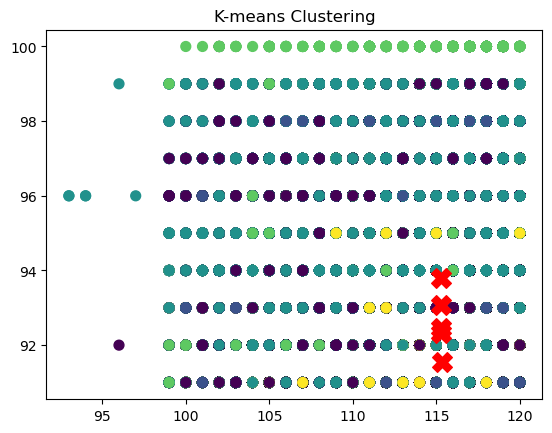

In [ ]:

#Selecting normalized values from the dataset for training, also remove the class labels
features=data.iloc[:,1:49:2]

# Perform K-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)

#Plot
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title('K-means Clustering')
plt.show()


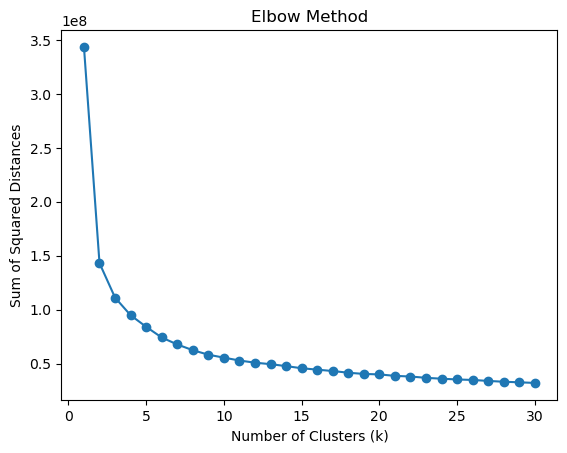

In [ ]:
# Run K-means for a range of k values
inertia = []
for k in range(1, 31):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 31), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()


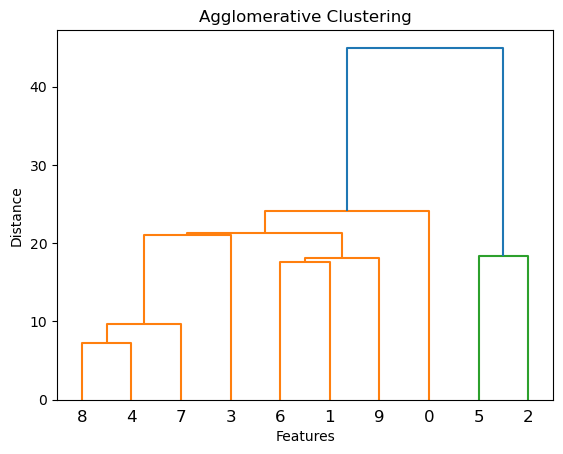

In [ ]:

features=features.sample(10)
# Agglomerative clustering
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='single')
labels = agg_cluster.fit_predict(features)

# Plotting the results
linked = linkage(features, method='single')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Agglomerative Clustering')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()
